# Dekompozycja

In [15]:
import numpy as np
import pandas as pd
from pandas import read_csv
from datetime import datetime
from pandas import Series
import matplotlib.pyplot as plt

Dekompozycja szeregów czasowych opiera się na myślenie o szeregu czasowym jako kombinacji:

- trendu, 
- sezonowości, 
- szumu.


Szereg czasowy zazwyczaj składa się z części powtarzającej się i szumu:

- Level: Średnia wartość w szeregu czasowym.
- Trend: Wzrastająca lub malejąca wartość w szeregu czasowym.
- Seasonality:  powtarzający się cykl krótkoterminowy w szeregu czasowym.
- Noise : losowe zaburzenia w szeregu czasowym.

Uważa się, że szereg czasowy jest agregatem lub kombinacją tych czterech elementów.
Wszystkie szeregi czasowe mają poziom (level) i szum. Elementy trendu i sezonowości są opcjonalne.

### Additive Model

y(t) = Level + Trend + Seasonality + Noise

### Multiplicative Model

y(t) = Level * Trend * Seasonality * Noise

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange

# Przykład
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [17]:
np.random.seed(10)
trend = [i for i in range(1,101)]
resid = [randrange(5) for i in range(1,101)]
season = 3*np.sin(np.linspace(1,100,100)/4*np.pi)
data = trend + season + resid
series = pd.Series(data)

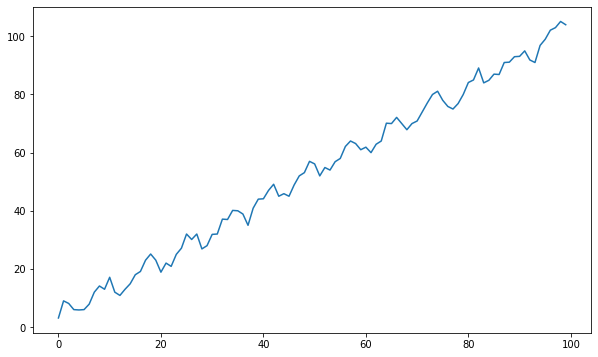

In [18]:
plt.figure(figsize=(10,6))
series.plot()
plt.show()

In [19]:
result = seasonal_decompose(data, model='additive', period=8, extrapolate_trend='freq')

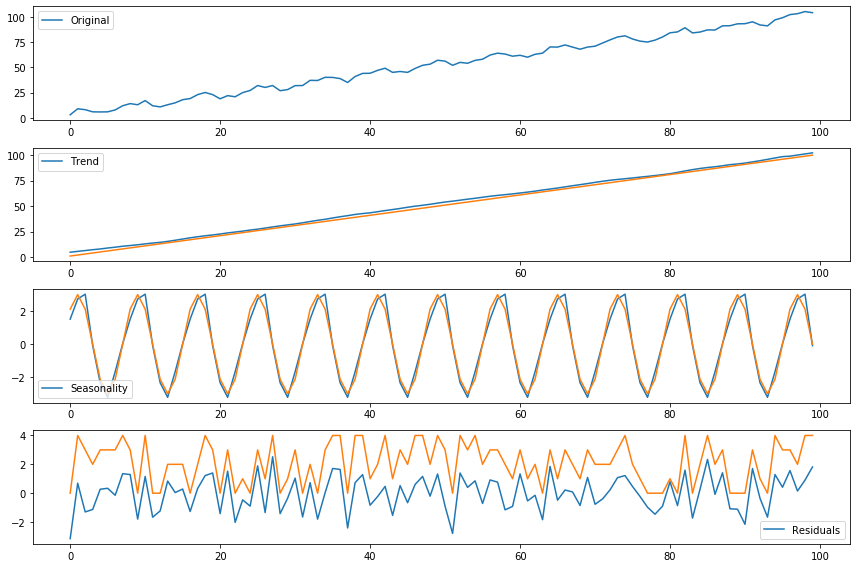

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.plot(trend)
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.plot(season)
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.plot(resid)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

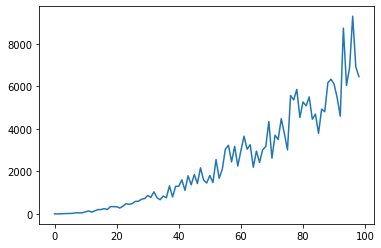

In [21]:
series = [i**2.0*np.random.uniform(0.5,1) for i in range(1,100)]
plt.plot(series)
plt.show()

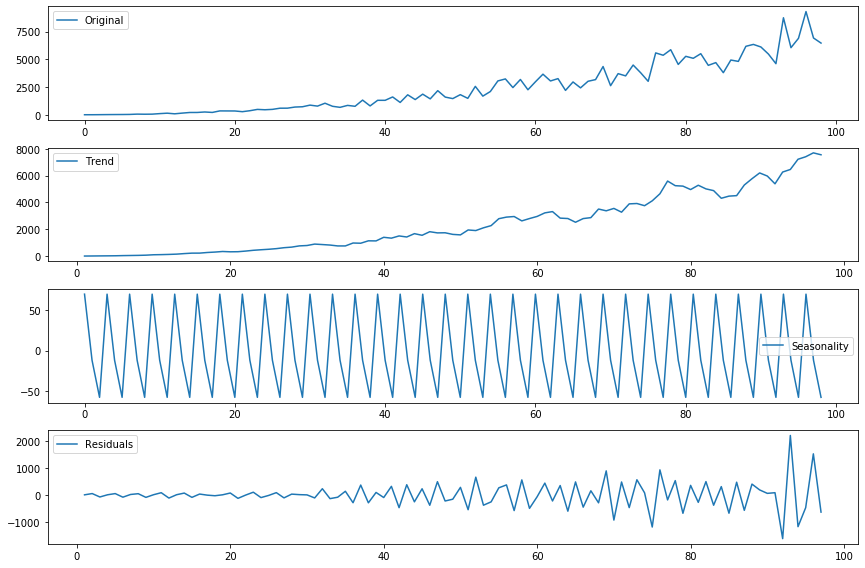

In [22]:
result = seasonal_decompose(series, model='additive', period=3)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

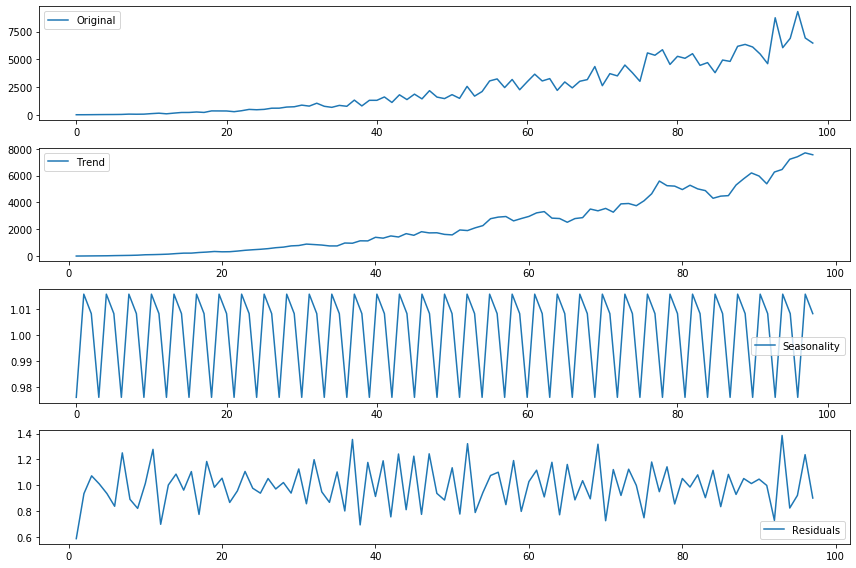

In [23]:
result = seasonal_decompose(series, model='multiplicative', period=3)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [33]:
import pandas as pd
series = pd.read_csv('data/daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])
series +=0.01

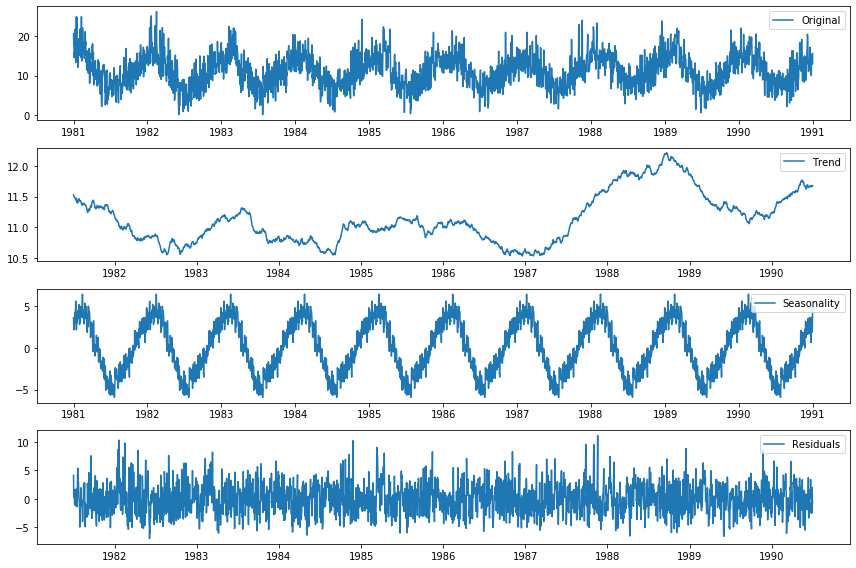

In [34]:
result = seasonal_decompose(series, model='additive', period=365)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

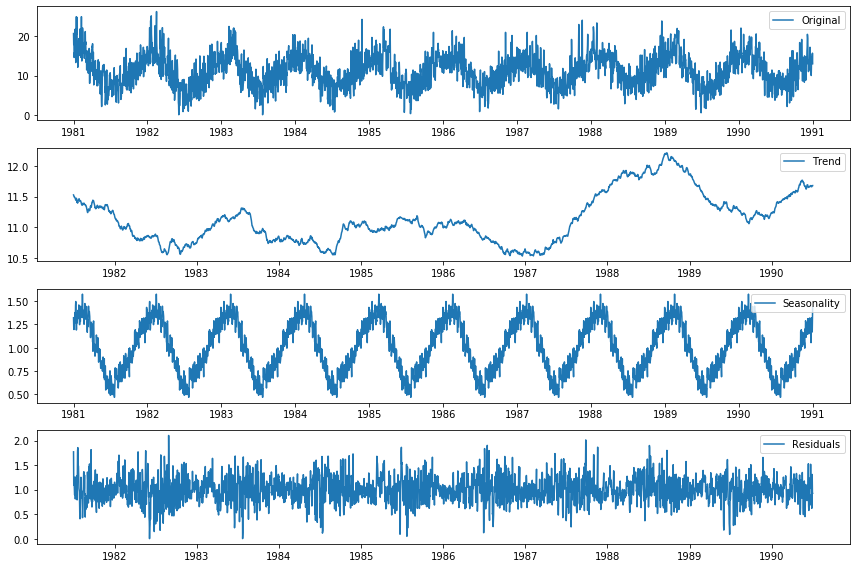

In [35]:
result = seasonal_decompose(series, model='multiplicative', period=365)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [36]:
from statsmodels.tsa.stattools import adfuller
result = seasonal_decompose(series, model='multiplicative', period=365)

dftest = adfuller(result.resid.dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)  

Test Statistic                  -27.173480
p-value                           0.000000
Lags Used                         2.000000
Number of Observations Used    3280.000000
Critical Value (1%)              -3.432345
Critical Value (5%)              -2.862422
Critical Value (10%)             -2.567239
dtype: float64


# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [28]:
import pandas as pd
series = pd.read_csv('data/international-airline-passengers.csv', index_col = 0, squeeze = True, parse_dates=['Month'])

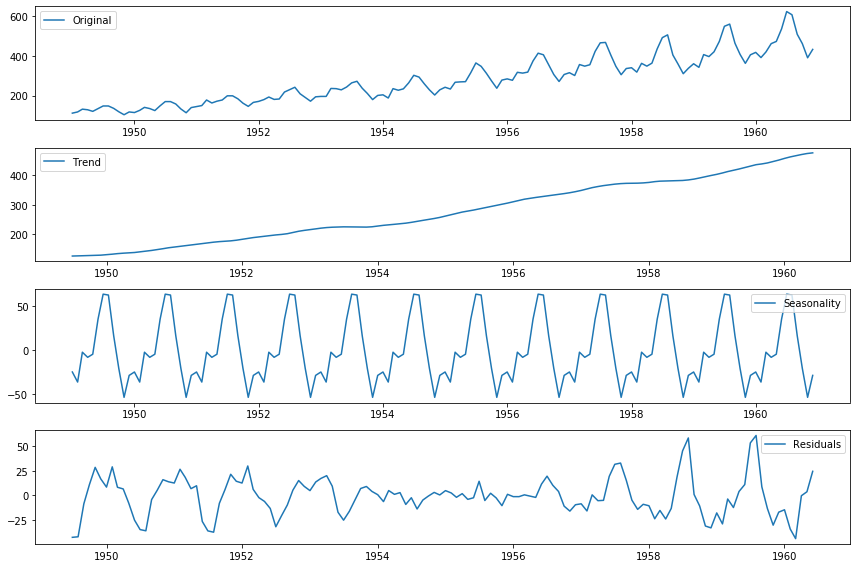

In [29]:
result = seasonal_decompose(series, model='additive', period=12)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

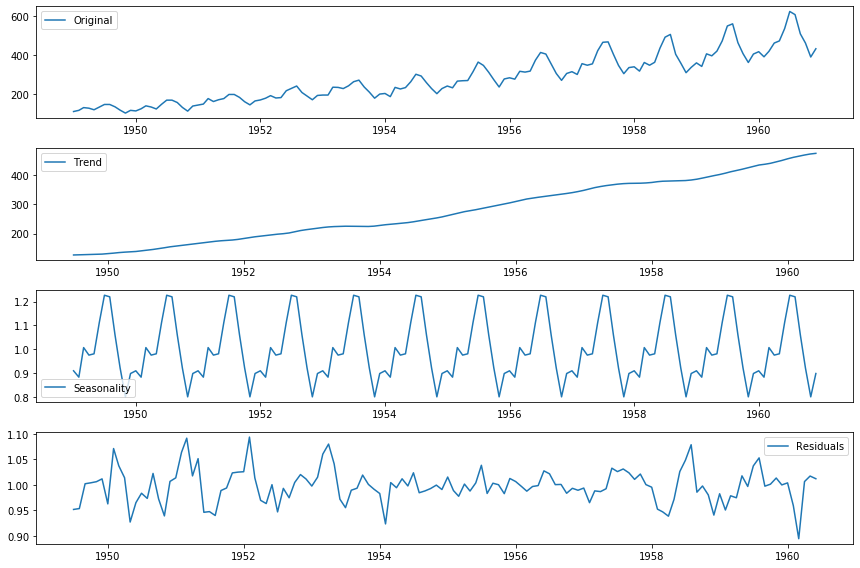

In [30]:
result = seasonal_decompose(series, model='multiplicative', period=12)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()